In [13]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy 
import numpy as np
import os

In [2]:

def read_csv(foldername:str, plot_legend:bool, save_dir:str):
#     idx = 0
    for  i in os.listdir(foldername):
        if i.endswith('.csv'):
            print('Reading csv File ' + i)
            df = pd.read_csv(foldername+ os.sep +i , delimiter=',')
            print(df.head(5))
#             print('DataFrame shape '+ str(df.shape))
#             print (str(type(values)) + str(values.shape))
            x = df['epoch']
            
            for col in df.columns:
                if col !='epoch':
                    y = df[col]
                    print(col)
                    plt.plot(x,y,label = col)
                    if plot_legend == True:
                        plt.legend()
                        
                    name = os.path.splitext(i)[0]
                    plt.savefig(fname = save_dir + os.sep + '{}_{}.png'.format(name,col))
                    plt.show()
    return        

Reading csv File atari_pacman_AAE.csv
   epoch        loss       psnr  sharp_diff      ssmi
0      0  853.588763  11.743650    5.651360  0.338512
1      1  641.015771  12.827189    5.882558  0.429217
2      2  631.142429  12.886316    5.937310  0.437842
loss


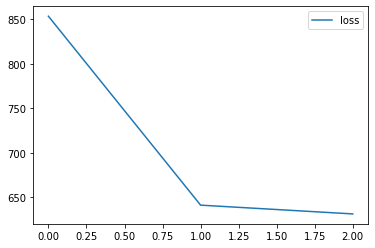

psnr


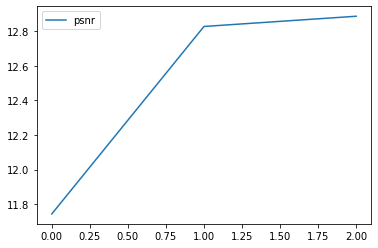

sharp_diff


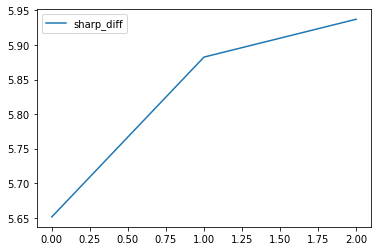

ssmi


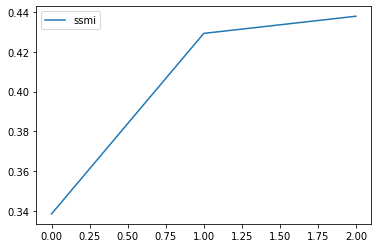

In [3]:
read_csv('/home/azeghost/git/new_GAN_models/Generative_Models/recording/atari_pacman_AAE/csv_dir', 
         True, save_dir = '/home/azeghost/git/new_GAN_models/Generative_Models/recording/atari_pacman_AAE/csv_dir')

In [27]:
def intersection(lists):
    common = lists[0]
    for lst in lists:
        common = list(set(common) & set(lst))
    return common

def compare_diff_csv(main_dir:str , save_dir:str ,model_name1:str, model_name2:str, model_name3:str = None,
                    plot_legend:bool = False):
    model_names  = [model_name1, model_name2, model_name3]
    dfs = []
    for m in model_names:
        if isinstance( m , str):
            csv_dir = main_dir + os.sep + m + os.sep + 'csv_dir' 
            for  i in os.listdir(csv_dir):
                if i.endswith('.csv'):
                    print('Reading csv File ' + i)
                    df1 = pd.read_csv(csv_dir + os.sep + i , delimiter=',')
                    dfs.append(df1)
    headers = [df.columns for df in dfs]
    common_col = intersection(headers)
    print(common_col)
    
    ax = plt.axes()
    for df in dfs:
        for col in common_col:
            if col !='epoch':
                y1 = dfs[0][col]
                x1 = dfs[0]['epoch']
                y2 = dfs[1][col]
                x2 = dfs[1]['epoch']
                ax.plot(x1,y1,label = model_name1)
                
#                 y2 = np.delete(y2 , :len(y1), 0)
                y2 = y2[,:len(y1)]
                print(y2)
                ax.plot(x1,y2,label = model_name2) 
                if plot_legend == True:
                    ax.legend()
                name = os.path.splitext(i)[0]
                plt.savefig(fname = save_dir + os.sep + '{}_{}.png'.format(name,col))
                plt.show()
            
    return  

SyntaxError: invalid syntax (<ipython-input-27-13ea0d6f5e28>, line 34)

In [26]:
[i for i in range(1, 11)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Reading csv File atari_pacman_AAE.csv
Reading csv File atari_pacman_AAE_Conv_together.csv
Reading csv File atari_pacman_AAE_Conv.csv
['epoch', 'loss']


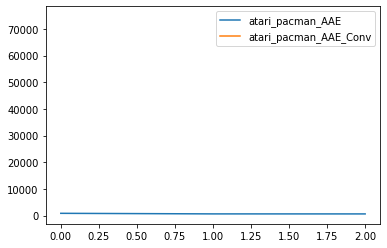

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
compare_diff_csv(main_dir = '/home/azeghost/git/new_GAN_models/Generative_Models/recording',
                save_dir = '/home/azeghost/git/new_GAN_models',
                 model_name1 = 'atari_pacman_AAE',
                 model_name2 = 'atari_pacman_AAE_Conv',
                 plot_legend = True
                )

In [ ]:
for col in dfs[0].columns:
            if col !='epoch' and  col in dfs[1].columns:
                y1 = dfs[0][col]
                x1 = dfs[0]['epoch']
                print(len(y1))
                y2 = dfs[1][col]
                x2 = dfs[1]['epoch']
                print(len(y2))
                print(col)
                ax.plot(x1,y1,label = model_name1) 
                ax.plot(x2,y2,label = model_name2) 
                if plot_legend == True:
                    ax.legend()
                name = os.path.splitext(i)[0]
                plt.savefig(fname = save_dir + os.sep + '{}_{}.png'.format(name,col))
                plt.show()

In [ ]:
    current__dir = os.getcwd()
    aggregates_dir = current__dir + '\\aggregates\\'
    print(aggregates_dir)
    idx = 0
    for  i in os.listdir(aggregates_dir):
        if i.endswith('.csv'):
            print('Reading csv File ' + i)
            df = pd.read_csv(aggregates_dir+i , delimiter=';')
            print(df.head(5))
            print('DataFrame shape '+ str(df.shape))
            values = df.values
            print (str(type(values)) + str(values.shape))
            #plt.plot(values[:,0],values[:,1])
            # iterationNum, mean, amin, amax, median, std, var = df.values
            # print(iterationNum,mean,amin,amax,median,std,var)
            plt.figure(figsize=(10, 7))
            ax = plt.axes()


            idx = idx + 1
            ax.plot(values[:,0], values[:,1], linewidth=2, markersize=12, label="mean")
            ax.plot(values[:,0], values[:,4], linewidth=2, markersize=12, label="median")
            ax.plot(values[:,0], values[:,1] + values[:,5], linestyle="--", c="b", linewidth=1)
            ax.plot(values[:,0], values[:,1] - values[:,5], linestyle="--", c="b", linewidth=1)
            # ax.set_ylabel("E[z_{}|g_{}]".format(latent_dim, intervened_factor_idx))
            # ax.set_xlabel("g_{}".format(intervened_factor_idx))
            ax.legend()
            plt.savefig('pic' + str(idx) + '.png')

    # ax.set_xlabel("int. g_{}".format(intervened_factor_idx))
    # ax.set_ylabel("E[z_{}|g_{}, g_{}]".format(latent_dim, const_factor_idx,
    #                                           intervened_factor_idx))
    ax.set_title("Interventional Effect (keeping parent fixed)")
    if plot_legend:
        ax.legend()